## **Logistic Regression**

* Regularization hyperparameters
* Convergence

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/UniversalBank.csv')
df.head()

,ID,Personal Loan,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,0,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,0,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,0,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,0,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [ ]:
df.drop(columns=['ID', 'ZIP Code'], inplace=True)
df.head()

,Personal Loan,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0,25,1,49,4,1.6,1,0,1,0,0,0
1,0,45,19,34,3,1.5,1,0,1,0,0,0
2,0,39,15,11,1,1.0,1,0,0,0,0,0
3,0,35,9,100,1,2.7,2,0,0,0,0,0
4,0,35,8,45,4,1.0,2,0,0,0,0,1


In [ ]:
## drop variables that are perfectly correlated
## sklearn has  mechanisms to drop those

In [ ]:
from re import X
## X and y
X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']

In [ ]:
## split training and test (70%/30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=591)

#### Fit a Predictive Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

## instance of LogisticRegressioin
## by default the L2-penalty is SELECTED (regularization)
## max_iter NOT to do GRID_SEARCH
## change the SOLVER if max_iter is not helping converge ('liblinear')
## 'liblinear' has a small step size
lr = LogisticRegression(max_iter = 1000)

## fit
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
## estimates of the slope
## regularization tries to zero out estimates
np.round(lr.coef_,2)

array([[-0.08,  0.09,  0.05,  0.66,  0.09,  1.66,  0.  , -0.44,  3.05,
        -0.72, -0.99]])

In [ ]:
pd.DataFrame(lr.coef_, columns=X.columns)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-0.079653,0.087909,0.054265,0.664382,0.087817,1.656638,0.001177,-0.439646,3.045587,-0.718364,-0.988954


In [ ]:
## Age is negatively associated with the likelihood to get a loan (older - less likely to get a loan)
## As age increases by 1 year, the log(odds) of getting a loan decrease by 0.08 controlling for other variables
## As age increases by 1 year, the odds of getting of loan CHANGE BY A FACTOR of 0.9231 controlling for other variables

In [ ]:
## intercept
np.round(lr.intercept_,2)

array([-11.2])

In [ ]:
## Check on the regularization
## L2 penalty
## C (the lower C is, the HIGHER the penalty)
lr = LogisticRegression(max_iter = 10000, C = 0.2)

## fit
lr.fit(X_train, y_train)

LogisticRegression(C=0.2, max_iter=10000)

In [ ]:
pd.DataFrame(lr.coef_, columns=X.columns)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-0.065561,0.07392,0.052139,0.636978,0.084052,1.52282,0.001129,-0.066341,2.038289,-0.496706,-0.572632


In [ ]:
## L2 penalty is calculated as sqrt(b1^2 + b2^2 + ...).
## this is called L2 norm
np.linalg.norm(lr.coef_, 2)

2.7345776679125784

In [ ]:
## Check on the regularization
## L1 penalty
## C (the lower C is, the HIGHER the penalty)
## L1 penalty is calculated as abs(b1) + abs(b2) + ...).
## TENDS to make parameters zero.
lr = LogisticRegression(solver = "liblinear", penalty = "l1", max_iter = 10000, C = 0.05)

## fit
lr.fit(X_train, y_train)

LogisticRegression(C=0.05, max_iter=10000, penalty='l1', solver='liblinear')

In [ ]:
pd.DataFrame(lr.coef_, columns=X.columns)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-0.436942,0.434587,0.045979,0.446596,0.025346,1.301895,0.001143,0.0,0.961267,0.0,0.0


In [ ]:
## when you have many predictors in a PREDICTIVE logistic regression
## you need to use regularization (apply different values of C)
## hyperparameter grid search (penalty (l2, l1), also on C)

In [ ]:
## Grid Search
from sklearn.model_selection import GridSearchCV

## create GRID
param_grid = {
    "penalty": ["l1", "l2"],
    "C" : [0.01, 0.05, 0.5, 1]
}

## instance of the LR model
lr = LogisticRegression(solver = "liblinear", max_iter = 10000)

## instance of the GridSearchCV
grid = GridSearchCV(lr, param_grid = param_grid, cv = 5, n_jobs = -1)

## fit
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1], 'penalty': ['l1', 'l2']})

In [ ]:
## best model
grid.best_params_

{'C': 0.5, 'penalty': 'l1'}

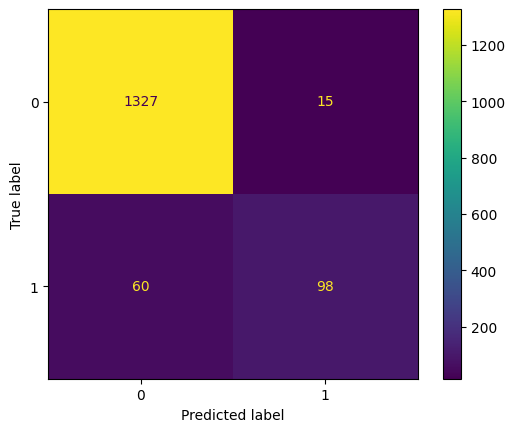

In [ ]:
## based on the performance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

ConfusionMatrixDisplay(confusion_matrix(y_test, grid.predict(X_test))).plot()

In [ ]:
## it can still be better
## 0.5 to something better
from sklearn.metrics import auc, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, grid.predict_proba(X_test)[:,1])
auc(fpr, tpr)

0.9570120168273312

In [ ]:
## maybe 0.5 can get even better
## 0.057 is where the biggest difference between TPR and FPR
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.057118959079408615

In [ ]:
yhat_LR = (grid.predict_proba(X_test)[:,1] > optimal_threshold).astype('int')

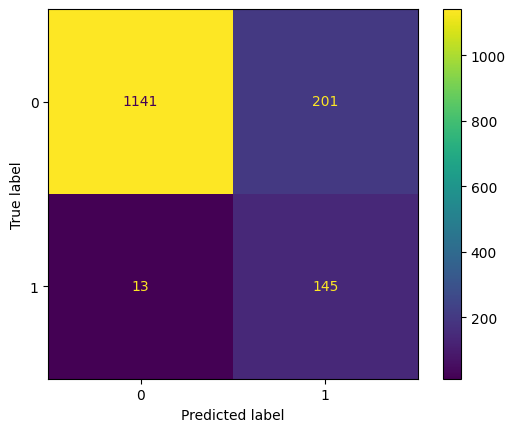

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, yhat_LR)).plot()